# Introdução à Neurociência Computacional - Atividade 3

Nome: Thiago Takechi Ohno Bezerra

NUSP: 13239511

In [1]:
import numpy as np
import scipy.signal as sgn
import matplotlib.pyplot as plt

# Definição de Funções

## Corrente T - Modelo tálamo-cortical

In [2]:
# Parâmetro de razão entre as áreas
p = 1 / 3

In [103]:
### EDOs ###


def dVS_dt(V_S, m, h, n, V_D, I_injS, C_S, G_LS, E_L, G_Na, E_Na, G_K, E_K, G_C):
    """
    C_S: p*100e-12 F
    G_LS: 5e-9 S
    G_Na: p*3e-6 S
    G_K: p*2e-6 S
    """
    # print(f"G_LS: {-G_LS*(V_S - E_L)}")
    # print(f"G_Na: {G_Na*m**2*h*(V_S - E_Na)}")
    # print(f"G_K: {G_K*n**2*(V_S - E_K)}")
    # print(f"G_C : {G_C*(V_D - V_S)}")
    # print(f"I_injS: {I_injS}")

    return (
        1
        / C_S
        * (
            -G_LS * (V_S - E_L)
            - G_Na * m**2 * h * (V_S - E_Na)
            - G_K * n**2 * (V_S - E_K)
            + G_C * (V_D - V_S)
            + I_injS
        )
    )


def dVD_dt(
    V_D,
    m_Ca,
    m_KCa,
    Ca,
    m_KAHP,
    m_h,
    V_S,
    I_injD,
    C_D,
    G_LD,
    E_L,
    G_Ca,
    E_Ca,
    G_KCa,
    E_K,
    G_KAHP,
    G_h,
    E_h,
    G_C,
):
    """
    C_D:
    G_LD:
    G_Ca:
    G_KCa:
    G_KAHP:
    G_C:
    """

    return (
        1
        / C_D
        * (
            -G_LD * (V_D - E_L)
            - G_Ca * m_Ca**2 * (V_D - E_Ca)
            + I_KCa(V_D, Ca, m_KCa, G_KCa, E_K)
            + I_KAHP(V_D, m_KAHP, G_KAHP, E_K)
            + I_h(V_D, m_h, G_h, E_h)
            + G_C * (V_S - V_D)
            + I_injD
        )
    )


def I_KCa(V_D, Ca, m_KCa, G_KCa, E_K):
    print("*" * 10)
    print(f"m_KCa: {m_KCa}")
    print(f"Ca: {Ca}")
    print(f"V_D: {V_D}")
    print(f"E_K: {E_K}")
    print(f"chi(Ca): {chi(Ca)}")
    print(f"G_KCa: {G_KCa}")
    print(f"total: {G_KCa*m_KCa*chi(Ca)*(V_D - E_K)}")
    print("*" * 10)
    return -G_KCa * m_KCa * chi(Ca) * (V_D - E_K)


def I_KAHP(V_D, m_KAHP, G_KAHP, E_K):
    return -G_KAHP * m_KAHP * (V_D - E_K)


def I_h(V_D, m_h, G_h, E_h):
    return -G_h * m_h * (V_D - E_h)


def dCa_dt(Ca, m_Ca, V_D, tau_Ca, k, G_Ca, E_Ca):
    # print("*" * 10)
    # print(f"tauCa: {tau_Ca}")
    # print(f"k: {k}")
    # print(f"direita: {k*G_Ca*m_Ca**2*(V_D - E_Ca)}")
    # print(f"esquerda: {-Ca/tau_Ca}")
    # print(f"mca = {m_Ca}")
    # print(f"I_CA: {G_Ca*m_Ca**2*(V_D - E_Ca)}")
    # print(f"Ca: {Ca}")
    # print(f"G_Ca: {G_Ca}")
    # print("*" * 10)
    return -Ca / tau_Ca - k * G_Ca * m_Ca**2 * (V_D - E_Ca)


def dm_dt(m, V_S):
    return alpha_m(V_S) * (1 - m) - beta_m(V_S) * m  # (m_inf(V_S) - m) / tau_m(V_S)


def dh_dt(h, V_S):
    return alpha_h(V_S) * (1 - h) - beta_h(V_S) * h  # (h_inf(V_S) - h) / tau_h(V_S)


def dn_dt(n, V_S):
    return alpha_n(V_S) * (1 - n) - beta_n(V_S) * n  # (n_inf(V_S) - n) / tau_m(V_S)


def dm_Ca_dt(m_Ca, V_D):
    return (
        alpha_m_Ca(V_D) * (1 - m_Ca) - beta_m_Ca(V_D) * m_Ca
    )  # (m_Ca_inf(V_D) - m_Ca) / tau_m_Ca(V_D)


def dm_KCa_dt(m_KCa, V_D):
    return (
        alpha_m_KCa(V_D) * (1 - m_KCa) - beta_m_KCa(V_D) * m_KCa
    )  # (m_KCa_inf(V_D) - m_KCa) / tau_m_KCa(V_D)


def dm_KAHP_dt(m_KAHP, Ca):
    return (
        alpha_m_KAHP(Ca) * (1 - m_KAHP) - beta_m_KAHP(Ca) * m_KAHP
    )  # (m_KAHP_inf(Ca) - m_KAHP) / tau_m_KAHP(Ca)


def dm_h_dt(m_h, V_D):
    return (m_h_inf(V_D) - m_h) / tau_m_h(V_D)


### Gating Variables ###

# m #


def alpha_m(V_S):
    if V_S == -0.0469:
        return 1280
    else:
        return 320 * 10**3 * (V_S + 0.0469) / (1 - np.exp(-250 * (V_S + 0.0469)))


def beta_m(V_S):
    if V_S == -0.0199:
        return 1400
    else:
        return 280 * 10**3 * (V_S + 0.0199) / (np.exp(200 * (V_S + 0.0199)) - 1)


def m_inf(V_S):
    return alpha_m(V_S) / (alpha_m(V_S) + beta_m(V_S))


def tau_m(V_S):
    return 1 / (alpha_m(V_S) + beta_m(V_S))


# h #


def alpha_h(V_S):
    return 128 * np.exp(-55.556 * (V_S + 0.043))


def beta_h(V_S):
    return 4000 / (1 + np.exp(-200 * (V_S + 0.020)))


def h_inf(V_S):
    return alpha_h(V_S) / (alpha_h(V_S) + beta_h(V_S))


def tau_h(V_S):
    return 1 / (alpha_h(V_S) + beta_h(V_S))


# n #


def alpha_n(V_S):
    if V_S == -0.0249:
        return 80
    else:
        return 16 * 10**3 * (V_S + 0.0249) / (1 - np.exp(-200 * (V_S + 0.0249)))


def beta_n(V_S):
    return 250 * np.exp(-25 * (V_S + 0.040))


def n_inf(V_S):
    return alpha_n(V_S) / (alpha_n(V_S) + beta_n(V_S))


def tau_n(V_S):
    return 1 / (alpha_n(V_S) + beta_n(V_S))


# m_Ca #


def alpha_m_Ca(V_D):
    return 1600 / (1 + np.exp(-72 * (V_D - 0.005)))


def beta_m_Ca(V_D):
    if V_D == -0.0089:
        return 100
    else:
        return 2 * 10**4 * (V_D + 0.0089) / (np.exp(200 * (V_D + 0.0089)) - 1)


def m_Ca_inf(V_D):
    return alpha_m_Ca(V_D) / (alpha_m_Ca(V_D) + beta_m_Ca(V_D))


def tau_m_Ca(V_D):
    return 1 / (alpha_m_Ca(V_D) + beta_m_Ca(V_D))


# m_KCa #


def alpha_m_KCa(V_D):
    if V_D <= -0.010:
        return np.exp((V_D + 0.050) / 0.011 - (V_D + 0.0535) / 0.027) / 0.018975
    else:
        return 2000 * np.exp(-37.037 * (V_D + 0.0535))


def beta_m_KCa(V_D):
    if V_D <= -0.010:
        return 2000 * np.exp(-(V_D + 0.0535) / 0.027) - alpha_m_KCa(V_D)
    else:
        return 0


def m_KCa_inf(V_D):
    return alpha_m_KCa(V_D) / (alpha_m_KCa(V_D) + beta_m_KCa(V_D))


def tau_m_KCa(V_D):
    return 1 / (alpha_m_KCa(V_D) + beta_m_KCa(V_D))


def chi(Ca):
    return min(4000 * Ca, 1)


# m_KAHP #


def alpha_m_KAHP(Ca):
    return min(20, 20000 * Ca)


def beta_m_KAHP(Ca):
    return 4


def m_KAHP_inf(Ca):
    return alpha_m_KAHP(Ca) / (alpha_m_KAHP(Ca) + beta_m_KAHP(Ca))


def tau_m_KAHP(Ca):
    return 1 / (alpha_m_KAHP(Ca) + beta_m_KAHP(Ca))


# m_h #


def m_h_inf(V_D):
    return 1 / (1 + np.exp(166.667 * (V_D + 0.070)))


def tau_m_h(V_D):
    return 0.272 + 1.499 / (1 + np.exp(-114.548 * (V_D + 0.0422)))

## Runge-Kutta

In [83]:
def model_equations(
    V_S,
    V_D,
    Ca,
    m,
    h,
    n,
    m_Ca,
    m_KCa,
    m_KAHP,
    m_h,
    I_injS,
    I_injD,
    C_S=p * 100e-12,
    G_LS=p * 5e-9,
    E_L=-60e-3,
    G_Na=p * 3e-6,
    E_Na=60e-3,
    G_K=p * 2e-6,
    E_K=-75e-3,
    C_D=(1 - p) * 100e-12,
    G_LD=(1 - p) * 5e-9,
    G_Ca=(1 - p) * 2e-6,
    E_Ca=80e-3,
    G_KCa=(1 - p) * 2.5e-6,
    G_KAHP=(1 - p) * 40e-9,
    G_h=0,
    E_h=-20e-3,
    G_C=20e-9,
    tau_Ca=50e-3,
    k=2.5 * 10**6 / (1 - p),
):

    return np.vstack(
        (
            dVS_dt(
                V_S, m, h, n, V_D, I_injS, C_S, G_LS, E_L, G_Na, E_Na, G_K, E_K, G_C
            ),
            dVD_dt(
                V_D,
                m_Ca,
                m_KCa,
                Ca,
                m_KAHP,
                m_h,
                V_S,
                I_injD,
                C_D,
                G_LD,
                E_L,
                G_Ca,
                E_Ca,
                G_KCa,
                E_K,
                G_KAHP,
                G_h,
                E_h,
                G_C,
            ),
            dCa_dt(Ca, m_Ca, V_D, tau_Ca, k, G_Ca, E_Ca),
            dm_dt(m, V_S),
            dh_dt(h, V_S),
            dn_dt(n, V_S),
            dm_Ca_dt(m_Ca, V_D),
            dm_KCa_dt(m_KCa, V_D),
            dm_KAHP_dt(m_KAHP, Ca),
            dm_h_dt(m_h, V_D),
        )
    )

In [101]:
def runge_kutta(
    t_i,
    t_f,
    I,
    dt=0.05e-3,
    C_S=p * 100e-12,
    G_LS=p * 5e-9,
    E_L=-60e-3,
    G_Na=p * 3e-6,
    E_Na=60e-3,
    G_K=p * 2e-6,
    E_K=-75e-3,
    C_D=(1 - p) * 100e-12,
    G_LD=(1 - p) * 5e-9,
    G_Ca=(1 - p) * 2e-6,
    E_Ca=80e-3,
    G_KCa=(1 - p) * 2.5e-6,
    G_KAHP=(1 - p) * 40e-9,
    G_h=0,
    E_h=-20e-3,
    G_C=20e-9,
    tau_Ca=50e-3,
    k=2.5 * 10**6 / (1 - p),
    V_S_init=-60e-3,
    V_D_init=-60e-3,
    Ca_init=0,
    m_init=0,
    h_init=0.5,
    n_init=0.4,
    m_Ca_init=0,
    m_KCa_init=0.2,
    m_KAHP_init=0.2,
    m_h_init=0,
):

    """
    Integra numericamente as equações do modelo pelo método de Runge-Kutta de quarta ordem e passo dt

    Parametros
    ---------
    t_i: tempo inicial da simulação (em ms)
    t_f: tempo final da simulação (em ms)
    I: dicionário com os parâmetros da corrente injetada
        I['init'] - lista com os tempos de início das correntes injetadas (em ms)
        I['fim'] - lista com os tempos de fim das correntes injetadas (em ms)
        I['int'] - lista com as intensidades das correntes injetadas (em uA/cm2)
    C_m: capacitância da membrana (= 1 uF/cm2)
    dt: passo de integração (= 0.001 ms)
    """
    n_pontos = int((t_f - t_i) / dt)

    V_S_out = np.ones(n_pontos) * V_S_init
    V_D_out = np.ones(n_pontos) * V_D_init
    Ca_out = np.ones(n_pontos) * Ca_init
    m_out = np.ones(n_pontos) * m_init
    h_out = np.ones(n_pontos) * h_init
    n_out = np.ones(n_pontos) * n_init
    m_Ca_out = np.ones(n_pontos) * m_Ca_init
    m_KCa_out = np.ones(n_pontos) * m_KCa_init
    m_KAHP_out = np.ones(n_pontos) * m_KAHP_init
    m_h_out = np.ones(n_pontos) * m_h_init
    I_KCa_out = np.zeros(n_pontos)
    I_KAHP_out = np.zeros(n_pontos)
    I_h_out = np.zeros(n_pontos)

    I_injS = cria_corrente(I["S"], t_i, t_f, dt)
    I_injD = cria_corrente(I["D"], t_i, t_f, dt)
    V_S = V_S_init
    V_D = V_D_init
    Ca = Ca_init
    m = m_init
    h = h_init
    n = n_init
    m_Ca = m_Ca_init
    m_KCa = m_KCa_init
    m_KAHP = m_KAHP_init
    m_h = m_h_init
    for i in range(1, n_pontos):

        k1 = dt * model_equations(
            V_S,
            V_D,
            Ca,
            m,
            h,
            n,
            m_Ca,
            m_KCa,
            m_KAHP,
            m_h,
            I_injS[i],
            I_injD[i],
            C_S,
            G_LS,
            E_L,
            G_Na,
            E_Na,
            G_K,
            E_K,
            C_D,
            G_LD,
            G_Ca,
            E_Ca,
            G_KCa,
            G_KAHP,
            G_h,
            E_h,
            G_C,
            tau_Ca,
            k,
        )
        # print(f"K1: {k1}")
        k2 = dt * model_equations(
            V_S + 0.5 * k1[0],
            V_D + 0.5 * k1[1],
            Ca + 0.5 * k1[2],
            m + 0.5 * k1[3],
            h + 0.5 * k1[4],
            n + 0.5 * k1[5],
            m_Ca + 0.5 * k1[6],
            m_KCa + 0.5 * k1[7],
            m_KAHP + 0.5 * k1[8],
            m_h + 0.5 * k1[9],
            I_injS[i],
            I_injD[i],
            C_S,
            G_LS,
            E_L,
            G_Na,
            E_Na,
            G_K,
            E_K,
            C_D,
            G_LD,
            G_Ca,
            E_Ca,
            G_KCa,
            G_KAHP,
            G_h,
            E_h,
            G_C,
            tau_Ca,
            k,
        )
        # print(f"K2: {k2}")
        k3 = dt * model_equations(
            V_S + 0.5 * k2[0],
            V_D + 0.5 * k2[1],
            Ca + 0.5 * k2[2],
            m + 0.5 * k2[3],
            h + 0.5 * k2[4],
            n + 0.5 * k2[5],
            m_Ca + 0.5 * k2[6],
            m_KCa + 0.5 * k2[7],
            m_KAHP + 0.5 * k2[8],
            m_h + 0.5 * k2[9],
            I_injS[i],
            I_injD[i],
            C_S,
            G_LS,
            E_L,
            G_Na,
            E_Na,
            G_K,
            E_K,
            C_D,
            G_LD,
            G_Ca,
            E_Ca,
            G_KCa,
            G_KAHP,
            G_h,
            E_h,
            G_C,
            tau_Ca,
            k,
        )
        k4 = dt * model_equations(
            V_S + k3[0],
            V_D + k3[1],
            Ca + k3[2],
            m + k3[3],
            h + k3[4],
            n + k3[5],
            m_Ca + k3[6],
            m_KCa + k3[7],
            m_KAHP + k3[8],
            m_h + k3[9],
            I_injS[i],
            I_injD[i],
            C_S,
            G_LS,
            E_L,
            G_Na,
            E_Na,
            G_K,
            E_K,
            C_D,
            G_LD,
            G_Ca,
            E_Ca,
            G_KCa,
            G_KAHP,
            G_h,
            E_h,
            G_C,
            tau_Ca,
            k,
        )
        # print(f"i: {i}")
        V_S = V_S + (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
        V_S_out[i] = V_S

        V_D = V_D + (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6
        V_D_out[i] = V_D

        Ca = Ca + (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2]) / 6
        Ca_out[i] = Ca

        m = m + (k1[3] + 2 * k2[3] + 2 * k3[3] + k4[3]) / 6
        m_out[i] = m

        h = h + (k1[4] + 2 * k2[4] + 2 * k3[4] + k4[4]) / 6
        h_out[i] = h

        n = n + (k1[5] + 2 * k2[5] + 2 * k3[5] + k4[5]) / 6
        n_out[i] = n

        m_Ca = m_Ca + (k1[6] + 2 * k2[6] + 2 * k3[6] + k4[6]) / 6
        m_Ca_out[i] = m_Ca

        m_KCa = m_KCa + (k1[7] + 2 * k2[7] + 2 * k3[7] + k4[7]) / 6
        m_KCa_out[i] = m_KCa

        m_KAHP = m_KAHP + (k1[8] + 2 * k2[8] + 2 * k3[8] + k4[8]) / 6
        m_KAHP_out[i] = m_KAHP

        m_h = m_h + (k1[9] + 2 * k2[9] + 2 * k3[9] + k4[9]) / 6
        m_h_out[i] = m_h

        # Correntes Dendríticas
        I_KCa_out[i] = I_KCa(V_D, Ca, m_KCa, G_KCa, E_K)
        I_KAHP_out[i] = I_KAHP(V_D, m_KAHP, G_KAHP, E_K)
        I_h_out[i] = I_h(V_D, m_h, G_h, E_h)
        break
    print(
        V_S_out[1],
        V_D_out[1],
        Ca_out[1],
        m_out[1],
        h_out[1],
        n_out[1],
        m_Ca_out[1],
        m_KCa_out[1],
        m_KAHP_out[1],
        m_h_out[1],
        I_KCa_out[1],
        I_KAHP_out[1],
        I_h_out[1],
    )
    return (
        V_S_out,
        V_D_out,
        Ca_out,
        m_out,
        h_out,
        n_out,
        m_Ca_out,
        m_KCa_out,
        m_KAHP_out,
        m_h_out,
        I_KCa_out,
        I_KAHP_out,
        I_h_out,
    )

## Funções Auxiliares

In [85]:
def cria_corrente(I, t_i, t_f, dt):
    t_init = I["init"]
    t_fim = I["fim"]
    I_int = I["int"]

    n_pontos = int((t_f - t_i) / dt)

    I_inj = np.zeros(n_pontos)
    for i_init, i_fim, i_int in zip(t_init, t_fim, I_int):
        I_inj[int(i_init / dt) : int(i_fim / dt)] = i_int
    return I_inj

In [86]:
def conta_pa(V, metodo=None, limiar=None, dt=0.001):
    """
    Conta o número de espikes na série temporal do potencial V de membrana (em mV) dado um limiar do potencial (em mV) ou
    o limiar para o valor da primeira ou segunda derivada (limiar em mV/ms ou mV/ms2). O método do limiar conta quantas
    vezes o potencial de membrana V ultrapassou o limiar estipulado. O método da primeira derivada conta quantas vezes
    houve um pico que ultrapassou o limiar estipulado na série temporal da primeira derivada. O método da segunda derivada
    considera quantos picos neativos ultrapassaram o limiar estipulado. No caso da segunda derivada foram considerados os
    picos negativos pois para cada potencial de ação, a segunda derivada apresenta  dois picos positivos.

    Parâmetros
    ----------
    V: série temporal do potencia de membrana (em mV)
    metodo: método para contagem de potenciais de ação. 'limiar' para contar o número de potenciais de ação considerando a
    quantidade de picos que ultrapassaram o limiar na série temporam do potencial V, 'diff' e 'diff2' para analisar quantos
    picos na série temporal da primeira ou segunda derivadas de V ultrapassaram o limiar estipulado.
    limiar: limiar para contagem dos potenciais de ação (em mV, mV/ms ou mV/ms2)


    Retorna
    ------
    tempos_pa: índices de tempo das ocorrências dos potenciais de ação nas séries temporais
    len(tempos_pa): número de potenciais de ação
    """

    if metodo == "limiar":
        tempos_pa = np.where((V[1:] >= limiar) & (V[:-1] <= limiar))[0]
    elif metodo == "diff":
        dVdt = calcula_derivada(V, dt)
        tempos_pa = sgn.argrelmax(dVdt, order=2)[0]
        tempos_pa = tempos_pa[np.where(dVdt[tempos_pa] >= limiar)[0]]
    elif metodo == "diff2":
        d2Vdt2 = calcula_seg_derivada(V, dt)
        tempos_pa = sgn.argrelmax(-d2Vdt2, order=2)[0]
        tempos_pa = tempos_pa[
            np.where((-d2Vdt2[tempos_pa] >= limiar) & (-d2Vdt2[tempos_pa] <= limiar))[0]
        ]
    else:
        raise ValueError(
            f"Método {metodo} não reconhecido. As opções são: limiar, diff e diff2."
        )

    return tempos_pa, len(tempos_pa)

In [87]:
def acha_periodo_minimo(tempos_pa, dt):

    min_T = np.inf
    for i in range(1, len(tempos_pa)):
        if tempos_pa[i] - tempos_pa[i - 1] < min_T:
            min_T = tempos_pa[i] - tempos_pa[i - 1]

    # Retorna o valor do período corrigindo pelo passo de tempo dt
    return min_T * dt

In [88]:
def calcula_frequencia(
    tempos_pa, metodo=None, correcao=None, t_i=None, t_f=None, n_min=21, dt=0.001
):
    """
    Calcula a frequência média de um trem de disparos de potenciais de ação a partir dos tempos de ocorrência destes. Para
    o cálculo da frequência considera apenas se forem gerados mais que n_min potenciais de ação. Por padrão, n_min = 21,
    menor número de potenciais de ação em um trem de disparos (questão 4). O número de potenciais de ação pode ser
    corrigido por pelo fator 'correcao' pois podem ser observados picos acima do limiar para contagem dos potenciais de
    ação que não correspondem de fato a um potencial de ação. Os métodos para o cálculo da frequência são 'media' e 'taxa'.

    Paramêtros
    ----------
    tempos_pa: tempos dos potenciais de ação no trem de disparo
    metodo: metodo a ser utilizado para o cálculo da frequência. O método 'media' calcula a frequência pelo inverso da
    média dos períodos entre a ocorrência de dois potenciais de ação. O método 'taxa' calcula a frequência pelo número de
    potenciais de ação dividido pelo período de estimulação (t_f - t_i).
    t_i: tempo inicial da estimulação (em ms)
    t_f: tempo final da estimulação (em ms)
    n_min: número mínimo de potenciais de ação para cálculo da frequência
    dt: passo temporal entre dois pontos da série temporal. Passo utilizado na solução numérica das equações diferenciais.

    Retorna
    -------
    freq: frequência média dos potenciais de ação no trem de disparo
    """

    freq, periodo = 0, 0

    if metodo == "media":
        if tempos_pa.size >= n_min:
            for i_t in range(correcao + 1, len(tempos_pa)):
                periodo += (
                    (tempos_pa[i_t] - tempos_pa[i_t - 1]) * dt / 1000
                )  # Converte o tempo de ms para s

            if periodo != 0:
                periodo = periodo / len(tempos_pa)
                freq = 1 / periodo
    elif metodo == "taxa":
        if tempos_pa.size >= n_min:
            freq = (tempos_pa.size - correcao) / (
                (t_f - t_i) / 1000
            )  # Converte o tempo de ms para s
    else:
        raise ValueError(
            f"Método {metodo} não reconhecido. As opções são: media e taxa"
        )

    return freq

In [89]:
def monta_grafico(
    V_S,
    V_D,
    t_i,
    t_f,
    dt=0.001,
    t_istim=None,
    t_fstim=None,
    figsize=(6, 6),
    ylabel=True,
    xlabel=True,
    fig=None,
    ax=None,
    save_fig_file=None,
):
    """
    Cria os gráficos das séries temporais de V, m, n, h e da corrente.

    Parâmetros
    ----------
    V: série temporal do potencial V (em mV)
    m: série temporal da variável m (sem unidade)
    n: série temporal da variável n (sem unidade)
    h: série temporal da variável h (sem unidade)
    t_i: tempo inicial da simulação (em ms)
    t_f: tempo final da simulação (em ms)
    t_istim: lista com tempos iniciais de estimulação (em ms). Caso nada seja passado, os tempos de estimulação não serão
    plotados
    t_fstim: lista com tempos finais de estimulação (em ms). Caso nada seja passado, os tempos de estimulação não serão
    plotados
    dt: passo temporal entre dois pontos das séries temporais. Passo utilizado na integração numérica.
    fig: objeto "figure" do pacote Matplotlib para construção do gráfico. Caso nada seja passado, este objeto é criado.
    ax: bjeto "axis" do pacote Matplotlib para construção do gráfico. Caso nada seja passado, este objeto é criado.
    save_fig_file: caminho para salvar o gráfico gerado. Caso nada seja passado, a figura não é salva.
    """
    new = False

    if (ax is None) & (fig is None):
        fig, ax = plt.subplots(2, 1, sharex=True, figsize=figsize)
        new = True

    fig.subplots_adjust(hspace=0.25)

    t = np.linspace(t_i, t_f, int((t_f - t_i) / dt))

    # Plota V_S
    ax[0].plot(t, V_S, "k")

    if ylabel:
        ax[0].set_ylabel(r"$\mathrm{V_{S}~(mV)}$", weight="bold", fontsize=12)

    if (t_istim is not None) and (t_fstim is not None):
        for i_t_istim, i_t_fstim in zip(t_istim, t_fstim):
            ax[0].plot(
                [i_t_istim, i_t_fstim], [1.25 * V_S.min(), 1.25 * V_S.min()], "r"
            )

    # Plota V_D
    ax[1].plot(t, V_D, color="k")

    if ylabel:
        ax[1].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", weight="bold", fontsize=12)

    if xlabel:
        ax[1].set_xlabel("t (s)", fontsize=12)

    if (t_istim is not None) and (t_fstim is not None):
        for i_t_istim, i_t_fstim in zip(t_istim, t_fstim):
            ax[1].plot(
                [i_t_istim, i_t_fstim], [1.25 * V_D.min(), 1.25 * V_D.min()], "r"
            )
    # Salva Figura

    if save_fig_file is not None:
        path = f"Figs/{save_fig_file}.pdf"
        fig.savefig(path, format="pdf", dpi=600, bbox_inches="tight")

    if new:
        return fig, ax

In [90]:
def monta_grafico_zoom(
    V,
    V_zoom,
    t_i,
    t_f,
    t_izoom,
    t_fzoom,
    dt=0.05e-3,
    ylabel=True,
    xlabel=True,
    fig=None,
    ax=None,
    save_fig_file=None,
):
    """
    Cria os gráficos das séries temporais de V, m, n, h e da corrente.

    Parâmetros
    ----------
    V: série temporal do potencial V (em mV)
    m: série temporal da variável m (sem unidade)
    n: série temporal da variável n (sem unidade)
    h: série temporal da variável h (sem unidade)
    t_i: tempo inicial da simulação (em ms)
    t_f: tempo final da simulação (em ms)
    t_istim: lista com tempos iniciais de estimulação (em ms). Caso nada seja passado, os tempos de estimulação não serão
    plotados
    t_fstim: lista com tempos finais de estimulação (em ms). Caso nada seja passado, os tempos de estimulação não serão
    plotados
    dt: passo temporal entre dois pontos das séries temporais. Passo utilizado na integração numérica.
    fig: objeto "figure" do pacote Matplotlib para construção do gráfico. Caso nada seja passado, este objeto é criado.
    ax: bjeto "axis" do pacote Matplotlib para construção do gráfico. Caso nada seja passado, este objeto é criado.
    save_fig_file: caminho para salvar o gráfico gerado. Caso nada seja passado, a figura não é salva.
    """
    new = False

    if (ax is None) & (fig is None):
        fig, ax = plt.subplots(2, 1, sharex=True, figsize=figsize)
        new = True

    fig.subplots_adjust(hspace=0.25)

    t = np.linspace(t_i, t_f, int((t_f - t_i) / dt))
    t_zoom = np.linspace(t_izoom, t_fzoom, int((t_fzoom - t_izoom) / dt))

    # Plota V
    ax[0].plot(t, V, "k")

    if ylabel:
        ax[0].set_ylabel(r"$\mathrm{V_{S}~(mV)}$", weight="bold", fontsize=12)

    if xlabel:
        ax[0].set_xlabel("t (s)", fontsize=12)

    # Plota V zoom
    ax[1].plot(t_zoom, V_zoom, color="k")

    if ylabel:
        ax[1].set_ylabel(r"$\mathrm{V_{S}~(mV)}$", weight="bold", fontsize=12)

    if xlabel:
        ax[1].set_xlabel("t (s)", fontsize=12)

    # Salva Figura

    if save_fig_file is not None:
        path = f"Figs/{save_fig_file}.pdf"
        fig.savefig(path, format="pdf", dpi=600, bbox_inches="tight")

    if new:
        return fig, ax

In [91]:
def monta_grafico_taxas(
    fig,
    ax,
    col,
    lin,
    x,
    var,
    var_ind,
    cora_x=0,
    cora_y=0,
    corb_x=0,
    corb_y=0,
    cori_x=0,
    cori_y=0,
    cort_x=0,
    cort_y=0,
    label_x1=None,
    label_x2=None,
):

    if lin is not None:
        ax[lin, col].plot(x, var[0], "b")
        ax[lin, col].plot(x, var[1], "r")

        s = r"$\mathrm{\alpha_{" + str(var_ind) + "}}$"
        ax[lin, col].annotate(
            s,
            xy=(x[np.argmin(var[0])], var[0].min()),
            xytext=(x[np.argmin(var[0])] + cora_x, var[0].min() + cora_y),
            color="b",
        )

        s = r"$\mathrm{\beta_{" + str(var_ind) + "}}$"
        ax[lin, col].annotate(
            s,
            xy=(x[np.argmin(var[1])], var[1].min()),
            xytext=(x[np.argmin(var[1])] + corb_x, var[1].min() + corb_y),
            color="r",
        )

        ax[lin, col].set_ylabel(var_ind, fontsize=12)

        if label_x1 is not None:
            ax[lin, col].set_xlabel(label_x1, fontsize=12)

        if label_x2 is not None:
            ax[lin, col + 1].set_xlabel(label_x2, fontsize=12)

        ax[lin, col + 1].plot(x, var[2], "g")

        s = r"$\mathrm{" + str(var_ind) + "_{\infty}}$"
        ax[lin, col + 1].set_ylabel(s, fontsize=12)
        ax[lin, col + 1].set_ylim(-0.1, 1.1)

        ax2 = ax[lin, col + 1].twinx()
        ax2.plot(x, var[3], "purple")

        s = r"$\mathrm{\tau_" + str(var_ind) + "}$"
        ax2.set_ylabel(s, fontsize=12)

        s = r"$\mathrm{" + str(var_ind) + "_{\infty}}}$"
        ax[lin, col + 1].annotate(
            s,
            xy=(x[np.argmin(var[2])], var[2].min()),
            xytext=(x[np.argmin(var[2])] + cori_x, var[2].min() + cori_y),
            color="g",
        )

        s = r"$\mathrm{\tau_{" + str(var_ind) + "}}$"
        ax2.annotate(
            s,
            xy=(x[np.argmin(var[3])], var[3].min()),
            xytext=(x[np.argmin(var[3])] + cort_x, var[3].min() + cort_y),
            color="purple",
        )

    else:
        ax[col].plot(x, var[0], "b")
        ax[col].plot(x, var[1], "r")

        s = r"$\mathrm{\alpha_{" + str(var_ind) + "}}$"
        ax[col].annotate(
            s,
            xy=(x[np.argmin(var[0])], var[0].min()),
            xytext=(x[np.argmin(var[0])] + cora_x, var[0].min() + cora_y),
            color="b",
        )

        s = r"$\mathrm{\beta_{" + str(var_ind) + "}}$"
        ax[col].annotate(
            s,
            xy=(x[np.argmin(var[1])], var[1].min()),
            xytext=(x[np.argmin(var[1])] + corb_x, var[1].min() + corb_y),
            color="r",
        )

        ax[col].set_ylabel(var_ind, fontsize=12)

        if label_x1 is not None:
            ax[col].set_xlabel(label_x1, fontsize=12)

        if label_x2 is not None:
            ax[col + 1].set_xlabel(label_x2, fontsize=12)

        ax[col + 1].plot(x, var[2], "g")

        s = r"$\mathrm{" + str(var_ind) + "_{\infty}}$"
        ax[col + 1].set_ylabel(s, fontsize=12)
        ax[col + 1].set_ylim(-0.1, 1.1)

        ax2 = ax[col + 1].twinx()
        ax2.plot(x, var[3], "purple")

        s = r"$\mathrm{\tau_" + str(var_ind) + "}$"
        ax2.set_ylabel(s, fontsize=12)

        s = r"$\mathrm{" + str(var_ind) + "_{\infty}}}$"
        ax[col + 1].annotate(
            s,
            xy=(x[np.argmin(var[2])], var[2].min()),
            xytext=(x[np.argmin(var[2])] + cori_x, var[2].min() + cori_y),
            color="g",
        )

        s = r"$\mathrm{\tau_{" + str(var_ind) + "}}$"
        ax2.annotate(
            s,
            xy=(x[np.argmin(var[3])], var[3].min()),
            xytext=(x[np.argmin(var[3])] + cort_x, var[3].min() + cort_y),
            color="purple",
        )

In [92]:
def acha_trens_disparo(V, dt, t_f, limiar_pa=-40e-3, limiar_trem=-66e-3):
    """
    Separa os potenciais de ação em tres de disparos. Determina os tempos dos potenciais de ação pela função 'conta_pa'
    utilizando o método do limiar com limiar dado por limiar_pa. Uma vez que o potencial é hierpolarizado entre os trens
    de disparos de potenciais de ação, os momentos de início do trem de disparo são determinados pela função 'conta_pa'
    utilizando o método do limiar com limiar dado por limiar_trem.

    Parâmetros
    ----------
    V: série temporal do potencial (em V)
    dt: passo de interação utilizado no cálculo da solução numérica das equações diferenciais
    t_f: tempo final da simulação
    limiar_pa: limiar para determinação dos potenciais de ação pela função conta_pa pelo método 'limiar'
    limiar_trem: limiar para determinação dos momentos de início dos trens de disparos pela função conta_pa pelo método
    'limiar'
    """
    tempos_pas = conta_pa(V, dt=dt, metodo="limiar", limiar=limiar_pa)[0]
    tempos_trens = conta_pa(V, dt=dt, metodo="limiar", limiar=limiar_trem)[0]

    # Adiciona o momento final da simulação para obter todos os trens de disparos
    tempos_trens = np.append(tempos_trens, [int(t_f / dt)])

    # Listas onde serão armazenados os índices dos potenciais de ação e os tempos dos potenciais de ação
    trens_ind = []
    trens = []

    # Separa os tempos dos potenciais de ação que estão entre o tempo de inicio de um trem de disparos e o trem de
    # disparos seguinte.
    for i in range(1, len(tempos_trens)):
        aux = tempos_pas[
            np.where(
                (tempos_pas >= tempos_trens[i - 1]) & (tempos_pas <= tempos_trens[i])
            )[0]
        ]
        trens_ind.append(aux)
        trens.append(aux * dt)

    return trens_ind, trens

# Questões

**Questão 1.** Para valores de V entre −85 e 50 mV e de [Ca] entre 0 e 2 × 10−3 M, gere gráficos para as 12 constantes de taxa das variáveis de gating do modelo de Pinsky-Rinzel.

In [93]:
# m, h, n, m_Ca, m_KCa - Dependem de V #

V = np.linspace(-85e-3, 50e-3, 300)

m_f = [alpha_m, beta_m, m_inf, tau_m]
m = np.zeros(shape=(4, 300))

h_f = [alpha_h, beta_h, h_inf, tau_h]
h = np.zeros(shape=(4, 300))

n_f = [alpha_n, beta_n, n_inf, tau_n]
n = np.zeros(shape=(4, 300))

m_Ca_f = [alpha_m_Ca, beta_m_Ca, m_Ca_inf, tau_m_Ca]
m_Ca = np.zeros(shape=(4, 300))

m_KCa_f = [alpha_m_KCa, beta_m_KCa, m_KCa_inf, tau_m_KCa]
m_KCa = np.zeros(shape=(4, 300))

var_list = [m, h, n, m_Ca, m_KCa]

for i_f_var, f_var in enumerate([m_f, h_f, n_f, m_Ca_f, m_KCa_f]):
    for i_f, f in enumerate(f_var):
        for i_v, v in enumerate(V):
            var_list[i_f_var][i_f][i_v] = f(v)


# m_KAHP - Apenas Ca #

Ca = np.linspace(0, 2e-3, 300)
m_KAHP = np.zeros(shape=(4, 300))

for i_f, f in enumerate([alpha_m_KAHP, beta_m_KAHP, m_KAHP_inf, tau_m_KAHP]):
    for i_ca, ca in enumerate(Ca):
        m_KAHP[i_f][i_ca] = f(ca)

(None,)

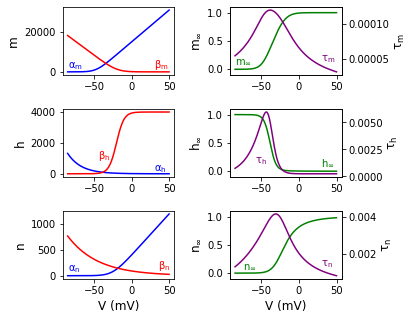

In [94]:
fig, ax = plt.subplots(3, 2, figsize=(5, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

V = np.linspace(-85, 50, 300)

# m #

monta_grafico_taxas(
    fig,
    ax,
    0,
    0,
    V,
    m,
    "m",
    cora_x=0,
    cora_y=2000,
    corb_x=-20,
    corb_y=2000,
    cori_x=0,
    cori_y=0.1,
    cort_x=-20,
    cort_y=0.000015,
)

# h #

monta_grafico_taxas(
    fig,
    ax,
    0,
    1,
    V,
    h,
    "h",
    cora_x=-20,
    cora_y=200,
    corb_x=40,
    corb_y=1000,
    cori_x=-20,
    cori_y=0.1,
    cort_x=-80,
    cort_y=0.001,
)

# n #

monta_grafico_taxas(
    fig,
    ax,
    0,
    2,
    V,
    n,
    "n",
    cora_x=0,
    cora_y=100,
    corb_x=-15,
    corb_y=100,
    cori_x=10,
    cori_y=0.075,
    cort_x=-20,
    cort_y=0.0005,
    label_x1="V (mV)",
    label_x2="V (mV)",
),

# fig.savefig('Figs/questao1_a.pdf', format='pdf', dpi=600, bbox_inches='tight')

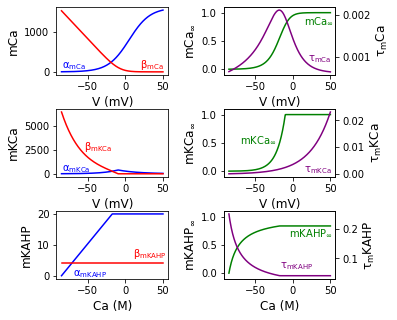

In [95]:
fig, ax = plt.subplots(3, 2, figsize=(5, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# m_Ca #

monta_grafico_taxas(
    fig,
    ax,
    0,
    0,
    V,
    m_Ca,
    "mCa",
    cora_x=0,
    cora_y=100,
    corb_x=-30,
    corb_y=100,
    cori_x=100,
    cori_y=0.8,
    cort_x=-30,
    cort_y=0.00025,
    label_x1="V (mV)",
    label_x2="V (mV)",
)

# m_KCa #

monta_grafico_taxas(
    fig,
    ax,
    0,
    1,
    V,
    m_KCa,
    "mKCa",
    cora_x=0,
    cora_y=300,
    corb_x=-45,
    corb_y=2500,
    cori_x=15,
    cori_y=0.5,
    cort_x=100,
    cort_y=0.0005,
    label_x1="V (mV)",
    label_x2="V (mV)",
)

# m_KAHP #

monta_grafico_taxas(
    fig,
    ax,
    0,
    2,
    V,
    m_KAHP,
    "mKAHP",
    cora_x=15,
    cora_y=0,
    corb_x=95,
    corb_y=2,
    cori_x=80,
    cori_y=0.65,
    cort_x=0,
    cort_y=0.025,
    label_x1="Ca (M)",
    label_x2="Ca (M)",
)

# fig.savefig('Figs/questao1_b.pdf', format='pdf', dpi=600, bbox_inches='tight')

**Questão 2.** Simule o modelo com as equações e parâmetros dados acima para t entre 0 e 2s. Gere como resultados de sua simulação gráficos que se pareçam com os das Figuras 2 e 3. As Figuras 2 e 3 são cópias escaneadas das Figuras 4.15 e 4.16 do livro de Miller mencionado acima (as figuras foram escaneadas com um celular, por isso estão tortas). Interprete os resultados. Para detectar um disparo somático, use o mesmo critério adotado por Miller: um disparo ocorre quando VS ultrapassa −10 mV e um novo disparo só pode acontecer depois que o potencial de membrana retorna para um valor abaixo de −30 mV.

**********
m_KCa: 0.2
Ca: 0
V_D: -0.06
E_K: -0.075
chi(Ca): 0
G_KCa: 1.666666666666667e-06
total: 0.0
**********
**********
m_KCa: [0.18795339]
Ca: [0.]
V_D: [-0.06003]
E_K: -0.075
chi(Ca): [0.]
G_KCa: 1.666666666666667e-06
total: [0.]
**********
**********
m_KCa: [0.18870529]
Ca: [2.36718526e-12]
V_D: [-0.06003867]
E_K: -0.075
chi(Ca): [9.46874104e-09]
G_KCa: 1.666666666666667e-06
total: [4.45548928e-17]
**********
**********
m_KCa: [0.17730647]
Ca: [4.47021583e-12]
V_D: [-0.06007507]
E_K: -0.075
chi(Ca): [1.78808633e-08]
G_KCa: 1.666666666666667e-06
total: [7.8863157e-17]
**********
**********
m_KCa: [0.17734441]
Ca: [6.05060621e-12]
V_D: [-0.06007589]
E_K: -0.075
chi(Ca): [2.42024248e-08]
G_KCa: 1.666666666666667e-06
total: [1.06761221e-16]
**********
-0.06214107707309623 -0.0600758912442276 6.050606212080477e-12 0.0049838741557377475 0.5086549296953222 0.39162459021747886 0.0007149189053855478 0.17734440677107016 0.19996000400096062 1.7977621855306558e-05 -1.0676122073237898e-16 -7

(<Figure size 432x432 with 2 Axes>,
 array([<AxesSubplot:ylabel='$\\mathrm{V_{S}~(mV)}$'>,
        <AxesSubplot:xlabel='t (s)', ylabel='$\\mathrm{V_{D}~(mV)}$'>],
       dtype=object))

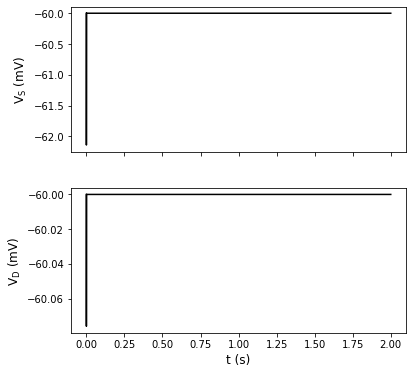

In [104]:
# Parâmetros Temporais
t_i = 0  # em s
t_f = 2  # em s
dt = 0.05e-3  # em s

I = {
    "S": {"init": [0], "fim": [2], "int": [0]},
    "D": {"init": [0], "fim": [2], "int": [0]},
}

V_S, V_D, Ca, m, h, n, m_Ca, m_KCa, m_KAHP, m_h, i_KCa, i_KAHP, _ = runge_kutta(
    t_i=t_i, t_f=t_f, I=I, dt=dt
)

monta_grafico(V_S * 1000, V_D * 1000, t_i, t_f, dt=dt)
# print(V_S_out[1], V_D_out[1], Ca_out[1], m_out[1], h_out[1], n_out[1], m_Ca_out[1], m_KCa_out[1], m_KAHP_out[1], m_h_out[1], I_KCa_out[1], I_KAHP_out[1], I_h_out[1])

In [24]:
V_S[0:10], V_D[0:10]

(array([-0.06      , -0.06214108, -0.06384122, -0.06519707, -0.06628283,
        -0.06715525, -0.06785813, -0.06842552, -0.06888403, -0.06925462]),
 array([-0.06      , -0.06007589, -0.06017838, -0.06030098, -0.06043865,
        -0.06058743, -0.06074419, -0.06090647, -0.06107233, -0.06124021]))

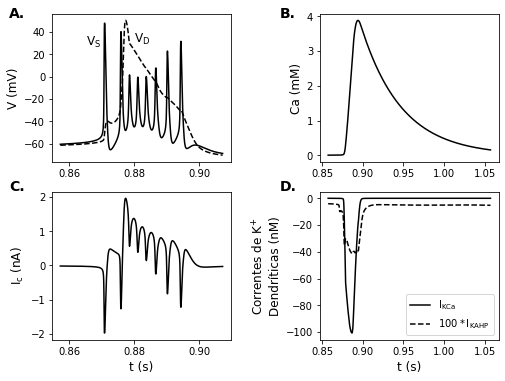

In [113]:
# Plota gráficos em zoom #

tempos_ind, tempos = acha_trens_disparo(
    V_S, dt, t_f, limiar_pa=-40e-3, limiar_trem=-66e-3
)
ind_centro = int(0.5 * (tempos_ind[1][0] + tempos_ind[1][-1]))
t_centro = 0.5 * (tempos[1][0] + tempos[1][-1])

fig, ax = plt.subplots(2, 2, figsize=(8, 6))
plt.subplots_adjust(wspace=0.5)

t = np.linspace(t_centro - 25e-3, t_centro + 25e-3, int(50e-3 / dt))
ax[0, 0].plot(
    t, 1000 * V_S[ind_centro - int(25e-3 / dt) : ind_centro + int(25e-3 / dt)], "k"
)
ax[0, 0].plot(
    t, 1000 * V_D[ind_centro - int(25e-3 / dt) : ind_centro + int(25e-3 / dt)], "k--"
)
ax[0, 0].set_ylabel("V (mV)", fontsize=12)
ax[0, 0].annotate(
    "$\mathrm{V_{D}}$",
    xy=(
        0.88,
        1000 * max(V_D[ind_centro - int(25e-3 / dt) : ind_centro + int(25e-3 / dt)])
        - 20,
    ),
    xytext=(
        0.88,
        1000 * max(V_D[ind_centro - int(25e-3 / dt) : ind_centro + int(25e-3 / dt)])
        - 20,
    ),
    fontsize=12,
)
ax[0, 0].annotate(
    "$\mathrm{V_{S}}$",
    xy=(
        0.865,
        1000 * max(V_S[ind_centro - int(25e-3 / dt) : ind_centro + int(25e-3 / dt)])
        - 20,
    ),
    xytext=(
        0.865,
        1000 * max(V_S[ind_centro - int(25e-3 / dt) : ind_centro + int(25e-3 / dt)])
        - 20,
    ),
    fontsize=12,
)

G_c = 20e-9
I_c = G_c * (V_D - V_S)
ax[1, 0].plot(
    t, I_c[ind_centro - int(25e-3 / dt) : ind_centro + int(25e-3 / dt)] * 1e9, "k"
)
ax[1, 0].set_ylabel(r"$\mathrm{I_{c}~(nA)}$", fontsize=12)
ax[1, 0].set_xlabel("t (s)", fontsize=12)

t = np.linspace(t_centro - 25e-3, t_centro + 175e-3, int(200e-3 / dt) - 1)
ax[0, 1].plot(
    t, Ca[ind_centro - int(25e-3 / dt) : ind_centro + int(175e-3 / dt)] * 1e3, "k"
)
ax[0, 1].set_ylabel("Ca (mM)", fontsize=12)

ax[1, 1].plot(
    t,
    i_KCa[ind_centro - int(25e-3 / dt) : ind_centro + int(175e-3 / dt)] * 1e9,
    "k",
    label=r"$\mathrm{I_{KCa}}$",
)
ax[1, 1].plot(
    t,
    100 * i_KAHP[ind_centro - int(25e-3 / dt) : ind_centro + int(175e-3 / dt)] * 1e9,
    "k--",
    label=r"$\mathrm{100*I_{KAHP}}$",
)
ax[1, 1].set_ylabel(
    "Correntes de " + r"$\mathrm{K^{+}}$" + "\nDendríticas (nM)", fontsize=12
)
ax[1, 1].set_xlabel("t (s)", fontsize=12)
ax[1, 1].legend()

fig.text(0.05, 0.87, "A.", fontsize=14, weight="bold")
fig.text(0.52, 0.87, "B.", fontsize=14, weight="bold")
fig.text(0.05, 0.47, "C.", fontsize=14, weight="bold")
fig.text(0.52, 0.47, "D.", fontsize=14, weight="bold")

**Questão 3.** Faça um estudo de como o comportamento do modelo depende do valor da condutância de acoplamento Gc. Para isso, simule o seu modelo para quatro valores diferentes de Gc (além do que você já usou na questão 2): 0, 10 nS, 50 nS e 100 nS. Explique as diferenças de comportamento observadas usando gráficos apropriados para sustentar seus argumentos. Dica: leia o artigo original de Pinsky-Rinzel disponibilizado na página da disciplina no Google Sala de Aula.

In [116]:
# Parâmetros Temporais
t_i = 0  # em s
t_f = 2  # em s
dt = 0.05e-3  # em s

I = {
    "S": {"init": [0], "fim": [2], "int": [0]},
    "D": {"init": [0], "fim": [2], "int": [0]},
}

V_S, V_D = np.zeros(shape=(5, int((t_f - t_i) / dt))), np.zeros(
    shape=(5, int((t_f - t_i) / dt))
)
trens_ind, trens = [], []
for i, g_c in enumerate([0, 10e-9, 20e-9, 50e-9, 100e-9]):
    V_S[i], V_D[i] = runge_kutta(t_i=t_i, t_f=t_f, I=I, dt=dt, G_C=g_c)[:2]

    aux = acha_trens_disparo(
        V_S[i], dt=dt, t_f=t_f, limiar_pa=-40e-3, limiar_trem=-66e-3
    )
    trens_ind.append(aux[0][-2])
    trens.append(aux[1][-2])

163.2290598999989


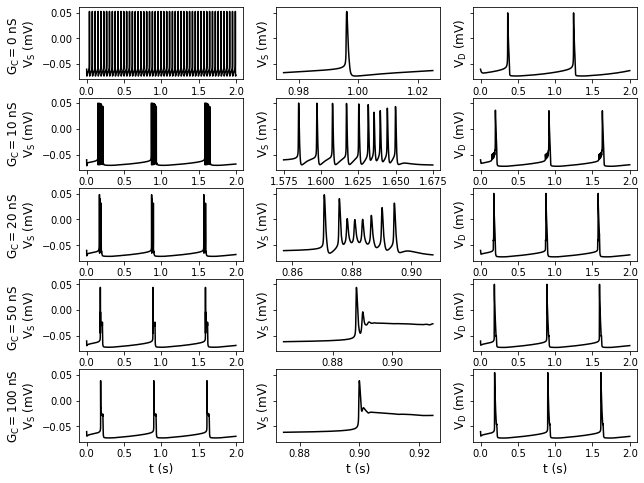

In [153]:
fig, ax = plt.subplots(5, 3, figsize=(10, 8), sharey=True)

t = np.linspace(0, 2, int(2 / dt))

# G_c = 0 nS #
t_centro = int(1 / dt)
monta_grafico_zoom(
    V_S[0],
    V_S[0][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=1 - 25e-3,
    t_fzoom=1 + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[0],
)
ax[0, 2].plot(t, V_D[0], "k")
ax[0, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.77, r"$\mathrm{G_C=0~nS}$", fontsize=12, rotation="vertical")

# G_c = 10 nS #
t_centro = int(0.5 * (trens_ind[1][0] + trens_ind[1][-1]))
monta_grafico_zoom(
    V_S[1],
    V_S[1][(t_centro - int(50e-3 / dt)) : (t_centro + int(50e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 50e-3,
    t_fzoom=t_centro * dt + 50e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[1],
)
ax[1, 2].plot(t, V_D[1], "k")
ax[1, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.61, r"$\mathrm{G_C=10~nS}$", fontsize=12, rotation="vertical")

# G_c = 20 nS #
t_centro = int(0.5 * (trens_ind[2][0] + trens_ind[2][-1]))
monta_grafico_zoom(
    V_S[2],
    V_S[2][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[2],
)
ax[2, 2].plot(t, V_D[2], "k")
ax[2, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.45, r"$\mathrm{G_C=20~nS}$", fontsize=12, rotation="vertical")

# G_c = 50 nS #
t_centro = int(0.5 * (trens_ind[3][0] + trens_ind[3][-1]))
monta_grafico_zoom(
    V_S[3],
    V_S[3][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[3],
)
ax[3, 2].plot(t, V_D[3], "k")
ax[3, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.29, r"$\mathrm{G_C=50~nS}$", fontsize=12, rotation="vertical")

# G_c = 100 nS #
t_centro = int(0.5 * (trens_ind[4][0] + trens_ind[4][-1]))
monta_grafico_zoom(
    V_S[4],
    V_S[4][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[4],
)
ax[4, 2].plot(t, V_D[4], "k")
ax[4, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.13, r"$\mathrm{G_C=100~nS}$", fontsize=12, rotation="vertical")

# Eixo x #

ax[4, 0].set_xlabel("t (s)", fontsize=12)
ax[4, 1].set_xlabel("t (s)", fontsize=12)
ax[4, 2].set_xlabel("t (s)", fontsize=12)

**Questão 4.** Repita o que foi feito na questão 3 com o fator de conversão k dobrado: k = 5 × 10^6/(1 − p) M/C. Comente caso haja qualquer mudança observada em relação ao comportamento do modelo na questão 3.

In [167]:
# Parâmetros Temporais
t_i = 0  # em s
t_f = 2  # em s
dt = 0.05e-3  # em s

I = {
    "S": {"init": [0], "fim": [2], "int": [0]},
    "D": {"init": [0], "fim": [2], "int": [0]},
}

V_S, V_D = np.zeros(shape=(5, int((t_f - t_i) / dt))), np.zeros(
    shape=(5, int((t_f - t_i) / dt))
)
trens_ind, trens = [], []

for i, g_c in enumerate([0, 10e-9, 20e-9, 50e-9, 100e-9]):
    V_S[i], V_D[i] = runge_kutta(
        t_i=t_i, t_f=t_f, I=I, dt=dt, G_C=g_c, k=5 * 10**6 / (1 - p)
    )[:2]

    aux = acha_trens_disparo(
        V_S[i], dt=dt, t_f=t_f, limiar_pa=-40e-3, limiar_trem=-68e-3
    )
    trens_ind.append(aux[0][-2])
    trens.append(aux[1][-2])

157.19377349999922


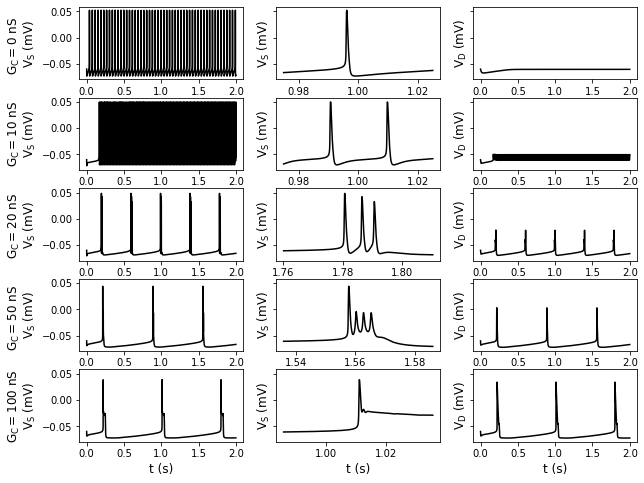

In [172]:
fig, ax = plt.subplots(5, 3, figsize=(10, 8), sharey=True)

t = np.linspace(0, 2, int(2 / dt))

# G_c = 0 nS #
t_centro = int(1 / dt)
monta_grafico_zoom(
    V_S[0],
    V_S[0][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=1 - 25e-3,
    t_fzoom=1 + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[0],
)
ax[0, 2].plot(t, V_D[0], "k")
ax[0, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.77, r"$\mathrm{G_C=0~nS}$", fontsize=12, rotation="vertical")

# G_c = 10 nS #
t_centro = int(1 / dt)
monta_grafico_zoom(
    V_S[1],
    V_S[1][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=1 - 25e-3,
    t_fzoom=1 + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[1],
)
ax[1, 2].plot(t, V_D[1], "k")
ax[1, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.61, r"$\mathrm{G_C=10~nS}$", fontsize=12, rotation="vertical")

# G_c = 20 nS #
t_centro = int(0.5 * (trens_ind[2][0] + trens_ind[2][-1]))
monta_grafico_zoom(
    V_S[2],
    V_S[2][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[2],
)
ax[2, 2].plot(t, V_D[2], "k")
ax[2, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.45, r"$\mathrm{G_C=20~nS}$", fontsize=12, rotation="vertical")

# G_c = 50 nS #
t_centro = int(0.5 * (trens_ind[3][0] + trens_ind[3][-1]))
monta_grafico_zoom(
    V_S[3],
    V_S[3][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[3],
)
ax[3, 2].plot(t, V_D[3], "k")
ax[3, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.29, r"$\mathrm{G_C=50~nS}$", fontsize=12, rotation="vertical")

# G_c = 100 nS #
t_centro = int(0.5 * (trens_ind[4][0] + trens_ind[4][-1]))
monta_grafico_zoom(
    V_S[4],
    V_S[4][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[4],
)
ax[4, 2].plot(t, V_D[4], "k")
ax[4, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.025, 0.13, r"$\mathrm{G_C=100~nS}$", fontsize=12, rotation="vertical")

# Eixo x #

ax[4, 0].set_xlabel("t (s)", fontsize=12)
ax[4, 1].set_xlabel("t (s)", fontsize=12)
ax[4, 2].set_xlabel("t (s)", fontsize=12)

In [193]:
# Parâmetros Temporais
t_i = 0  # em s
t_f = 2  # em s
dt = 0.05e-3  # em s

I = {
    "S": {"init": [0], "fim": [2], "int": [0]},
    "D": {"init": [0], "fim": [2], "int": [0]},
}


(
    V_S1,
    V_D1,
    Ca1,
    m1,
    h1,
    n1,
    m_Ca1,
    m_KCa1,
    m_KAHP1,
    m_h1,
    i_KCa1,
    i_KAHP1,
) = runge_kutta(t_i=t_i, t_f=t_f, I=I, dt=dt, G_C=20e-9)

(
    V_S2,
    V_D2,
    Ca2,
    m2,
    h2,
    n2,
    m_Ca2,
    m_KCa2,
    m_KAHP2,
    m_h2,
    i_KCa2,
    i_KAHP2,
) = runge_kutta(t_i=t_i, t_f=t_f, I=I, dt=dt, G_C=20e-9, k=5 * 10**6 / (1 - p))

69.36538279999877


**Questão 5.** Faça agora um estudo do efeito de correntes constantes injetadas no soma ou no dendrito. Usando o modelo com Gc = 50 nS e k = 5 × 10^6/(1 − p) M/C, faça primeiro um estudo do efeito de correntes constantes injetadas no dendrito (com Iinj (S) = 0). Use os seguintes valores de Iinj (D): 50 pA, 100 pA e 200 pA. Em seguida, faça Iinj (D) = 0 e simule o modelo para Iinj (S) tendo os mesmos três valores usados no primeiro estudo. Comente a respeito de quaisquer diferenças de comportamento observadas entre as injeções de corrente no dendrito e no soma.

In [230]:
# Parâmetros Temporais
t_i = 0  # em s
t_f = 2  # em s
dt = 0.05e-3  # em s

V_S, V_D = np.zeros(shape=(4, int((t_f - t_i) / dt))), np.zeros(
    shape=(4, int((t_f - t_i) / dt))
)
trens_ind, trens = [], []

for i, i_int in enumerate([0, 50e-12, 100e-12, 200e-12]):

    I = {
        "S": {"init": [0], "fim": [2], "int": [0]},
        "D": {"init": [0], "fim": [2], "int": [i_int]},
    }

    V_S[i], V_D[i] = runge_kutta(
        t_i=t_i, t_f=t_f, I=I, dt=dt, G_C=50e-9, k=5 * 10**6 / (1 - p)
    )[:2]

    aux = acha_trens_disparo(
        V_S[i], dt=dt, t_f=t_f, limiar_pa=-40e-3, limiar_trem=-66e-3
    )
    trens_ind.append(aux[0][-2])
    trens.append(aux[1][-2])

126.75780239999949


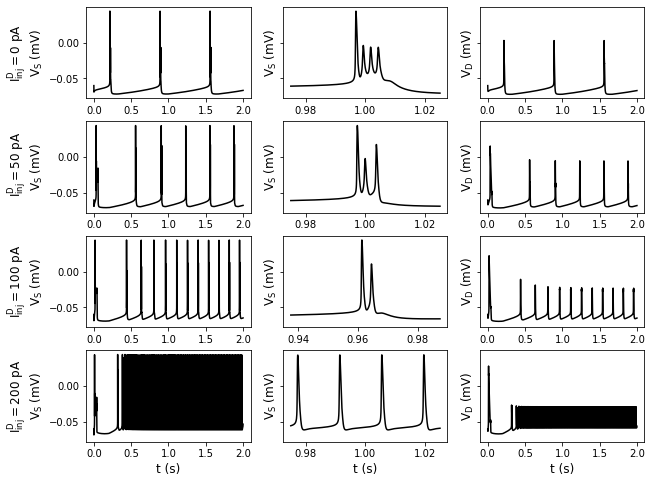

In [232]:
fig, ax = plt.subplots(4, 3, figsize=(10, 8), sharey=True)

t = np.linspace(0, 2, int(2 / dt))

# G_c = 0 nS #
t_centro = int(0.5 * (trens_ind[0][0] + trens_ind[0][-1]))
monta_grafico_zoom(
    V_S[0],
    V_S[0][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=1 - 25e-3,
    t_fzoom=1 + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[0],
)
ax[0, 2].plot(t, V_D[0], "k")
ax[0, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.015, 0.765, r"$\mathrm{I_{inj}^D=0~pA}$", fontsize=12, rotation="vertical")

# G_c = 10 nS #
t_centro = int(0.5 * (trens_ind[1][0] + trens_ind[1][-1]))
monta_grafico_zoom(
    V_S[1],
    V_S[1][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=1 - 25e-3,
    t_fzoom=1 + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[1],
)
ax[1, 2].plot(t, V_D[1], "k")
ax[1, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.015, 0.565, r"$\mathrm{I_{inj}^D=50~pA}$", fontsize=12, rotation="vertical")

# G_c = 20 nS #
t_centro = int(0.5 * (trens_ind[2][0] + trens_ind[2][-1]))
monta_grafico_zoom(
    V_S[2],
    V_S[2][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[2],
)
ax[2, 2].plot(t, V_D[2], "k")
ax[2, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.015, 0.355, r"$\mathrm{I_{inj}^D=100~pA}$", fontsize=12, rotation="vertical")

# G_c = 50 nS #
t_centro = int(1 / dt)
monta_grafico_zoom(
    V_S[3],
    V_S[3][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[3],
)
ax[3, 2].plot(t, V_D[3], "k")
ax[3, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.015, 0.155, r"$\mathrm{I_{inj}^D=200~pA}$", fontsize=12, rotation="vertical")

# Eixo x #

ax[3, 0].set_xlabel("t (s)", fontsize=12)
ax[3, 1].set_xlabel("t (s)", fontsize=12)
ax[3, 2].set_xlabel("t (s)", fontsize=12)

In [215]:
# Parâmetros Temporais
t_i = 0  # em s
t_f = 2  # em s
dt = 0.05e-3  # em s

V_S, V_D = np.zeros(shape=(4, int((t_f - t_i) / dt))), np.zeros(
    shape=(4, int((t_f - t_i) / dt))
)
trens_ind, trens = [], []

for i, i_int in enumerate([0, 50e-12, 100e-12, 200e-12]):

    I = {
        "S": {"init": [0], "fim": [2], "int": [i_int]},
        "D": {"init": [0], "fim": [2], "int": [0]},
    }

    V_S[i], V_D[i] = runge_kutta(
        t_i=t_i, t_f=t_f, I=I, dt=dt, G_C=50e-9, k=5 * 10**6 / (1 - p)
    )[:2]

    aux = acha_trens_disparo(
        V_S[i], dt=dt, t_f=t_f, limiar_pa=-40e-3, limiar_trem=-66e-3
    )
    trens_ind.append(aux[0])
    trens.append(aux[1])

127.09061540000039


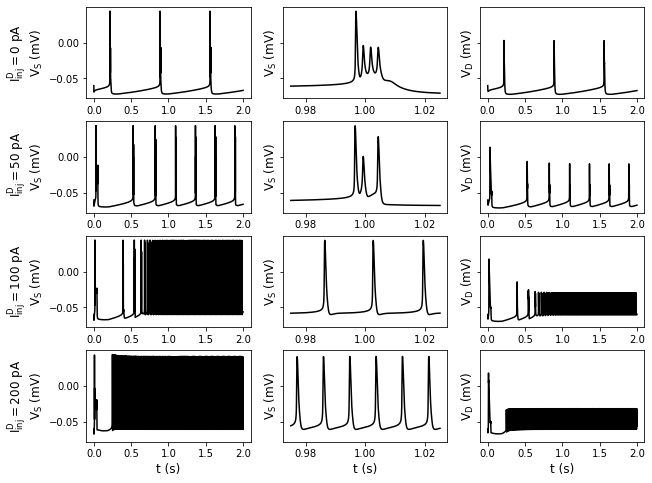

In [229]:
fig, ax = plt.subplots(4, 3, figsize=(10, 8), sharey=True)

t = np.linspace(0, 2, int(2 / dt))

# G_c = 0 nS #
t_centro = int(0.5 * (trens_ind[0][-2][0] + trens_ind[0][-2][-1]))
monta_grafico_zoom(
    V_S[0],
    V_S[0][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=1 - 25e-3,
    t_fzoom=1 + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[0],
)
ax[0, 2].plot(t, V_D[0], "k")
ax[0, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.015, 0.765, r"$\mathrm{I_{inj}^D=0~pA}$", fontsize=12, rotation="vertical")

# G_c = 10 nS #
t_centro = int(0.5 * (trens_ind[1][-2][0] + trens_ind[1][-2][-1]))
monta_grafico_zoom(
    V_S[1],
    V_S[1][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=1 - 25e-3,
    t_fzoom=1 + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[1],
)
ax[1, 2].plot(t, V_D[1], "k")
ax[1, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.015, 0.565, r"$\mathrm{I_{inj}^D=50~pA}$", fontsize=12, rotation="vertical")

# G_c = 20 nS #
t_centro = int(1 / dt)
monta_grafico_zoom(
    V_S[2],
    V_S[2][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[2],
)
ax[2, 2].plot(t, V_D[2], "k")
ax[2, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.015, 0.355, r"$\mathrm{I_{inj}^D=100~pA}$", fontsize=12, rotation="vertical")

# G_c = 50 nS #
t_centro = int(1 / dt)
monta_grafico_zoom(
    V_S[3],
    V_S[3][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt) - 1)],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[3],
)
ax[3, 2].plot(t, V_D[3], "k")
ax[3, 2].set_ylabel(r"$\mathrm{V_{D}~(mV)}$", fontsize=12)
fig.text(0.015, 0.155, r"$\mathrm{I_{inj}^D=200~pA}$", fontsize=12, rotation="vertical")

# Eixo x #

ax[3, 0].set_xlabel("t (s)", fontsize=12)
ax[3, 1].set_xlabel("t (s)", fontsize=12)
ax[3, 2].set_xlabel("t (s)", fontsize=12)

**Questão 6.** Volte ao modelo estudado na Questão 2 e acrescente ao compartimento dendrítico uma corrente ativada por hiperpolarização Ih. Mude também alguns parâmetros em relação aos usados na Questão 2 (veja abaixo). Use os seguintes parâmetros ao invés dos que estão listados na Tabela 1 (os parâmetros foram tirados do programa IH PR loop.m disponível na página web do livro de Miller; os parâmetros que não estão listados abaixo devem ser mantidos como na Tabela 1): G(S) L = p×1 nS; G(D) L = (1−p)×1 nS; GCa = (1−p)×2; 5 µS; GKCa = (1−p)×5 µS; GKAHP = (1−p)×0; 06 µS; Gc = 25 nS; k = 1×10^6/(1-p) M/C.

(a) Faça gráficos de m_hinf e τ_m_h para −100 ≤ VD ≤ 0.

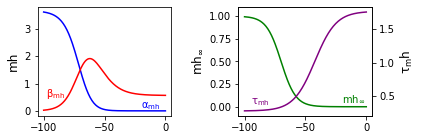

In [258]:
V = np.linspace(-100e-3, 0, 200)
m_h = m_h_inf(V)
tau = tau_m_h(V)

alpha_m_h = m_h / tau
beta_m_h = 1 / tau - alpha_m_h

var_mh = [alpha_m_h, beta_m_h, m_h_inf(V), tau_m_h(V)]

fig, ax = plt.subplots(1, 2, figsize=(6, 2))
plt.subplots_adjust(wspace=0.5)
V = np.linspace(-100, 0, 200)
monta_grafico_taxas(
    fig,
    ax,
    0,
    None,
    V,
    var_mh,
    "mh",
    cora_x=-20,
    cora_y=0.1,
    corb_x=2,
    corb_y=0.5,
    cori_x=-20,
    cori_y=0.05,
    cort_x=5,
    cort_y=0.1,
    label_x1=None,
    label_x2=None,
)

(b) Faça um estudo do efeito da condutância Gh sobre o intervalo entre rajadas no soma. Use quatro valores diferentes de Gh: 0, 5 nS, 10 nS e 15 nS. Para cada um desses valores, simule o modelo por 6 segundos e tente gerar gráficos similares aos da Figura 4.18 do livro de Miller (veja uma cópia escaneada dessa figura na Figura 4). Miller mostra gráficos do potencial de membrana somático para t entre 8 e 12 s, mas você pode fazer seus gráficos com t indo de 2 a 6 s. Para produzir gráficos como os da coluna da direita na Figura 4, você terá que definir um critério para o início e o fim de uma rajada. Miller, em seu código em Matlab IH_PR_loop.m dado na página web mencionada acima, usa o seguinte critério: uma rajada somática se inicia quando o potencial de membrana dendrítico ultrapassa VD = 0 e termina quando VD < −0,0500. Usando este critério (ou algum outro que você defina), determine o instante do ínicio da penúltima rajada de uma simulação t_pn. Faça agora o gráfico de V_S entre t_pn − 0,025 e t_pn + 0,025 (este será o gráfico em zoom dado na coluna da direita).

In [259]:
# Parâmetros Temporais
t_i = 0  # em s
t_f = 6  # em s
dt = 0.05e-3  # em s

I = {
    "S": {"init": [0], "fim": [2], "int": [0]},
    "D": {"init": [0], "fim": [2], "int": [0]},
}

V_S, V_D = np.zeros(shape=(4, int(t_f / dt))), np.zeros(shape=(4, int(t_f / dt)))
trens_ind, trens = [], []

for i, g_h in enumerate([0, 5e-9, 10e-9, 15e-9]):

    V_S[i], V_D[i] = runge_kutta(
        t_i=t_i,
        t_f=t_f,
        I=I,
        dt=dt,
        G_LS=p * 1e-9,
        G_LD=(1 - p) * 1e-9,
        G_Ca=(1 - p) * 2.5e-6,
        G_KCa=(1 - p) * 5e-6,
        G_KAHP=(1 - p) * 0.06e-6,
        G_C=25e-9,
        k=1e6 / (1 - p),
        G_h=g_h,
    )[:2]

    aux = acha_trens_disparo(
        V_S[i], dt=dt, t_f=t_f, limiar_pa=-40e-3, limiar_trem=-66e-3
    )

    # Salva os índices e tempos do penúltimo trem de disparos
    trens_ind.append(aux[0][-2])
    trens.append(aux[1][-2])

396.0236559999976


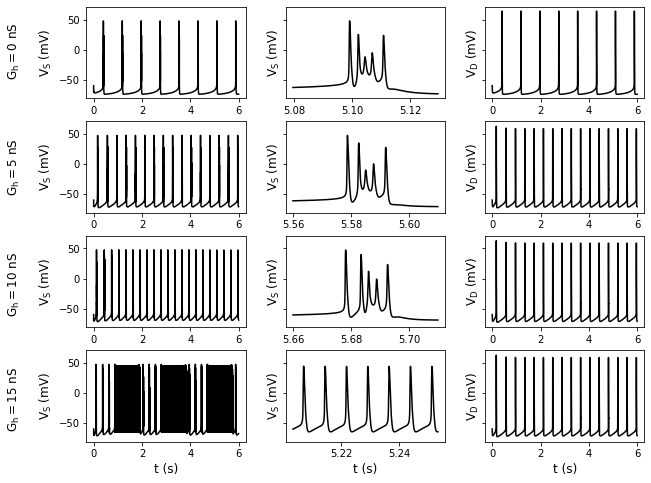

In [268]:
fig, ax = plt.subplots(4, 3, figsize=(10, 8), sharey=True)

plt.subplots_adjust(wspace=0.25)

t = np.linspace(0, 6, int(6 / dt))

t_centro = int(0.5 * (trens_ind[0][0] + trens_ind[0][-1]))
monta_grafico_zoom(
    1000 * V_S[0],
    1000 * V_S[0][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[0],
)
ax[0, 2].plot(t, 1000 * V_D[0], "k")
ax[0, 2].set_ylabel(r"$\mathrm{V_D~(mV)}$", fontsize=12)

t_centro = int(0.5 * (trens_ind[1][0] + trens_ind[1][-1]))
monta_grafico_zoom(
    1000 * V_S[1],
    1000 * V_S[1][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[1],
)
ax[1, 2].plot(t, 1000 * V_D[1], "k")
ax[1, 2].set_ylabel(r"$\mathrm{V_D~(mV)}$", fontsize=12)

t_centro = int(0.5 * (trens_ind[2][0] + trens_ind[2][-1]))
monta_grafico_zoom(
    1000 * V_S[2],
    1000 * V_S[2][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax[2],
)
ax[2, 2].plot(t, 1000 * V_D[1], "k")
ax[2, 2].set_ylabel(r"$\mathrm{V_D~(mV)}$", fontsize=12)

t_centro = int(0.5 * (trens_ind[3][0] + trens_ind[3][-1]))
monta_grafico_zoom(
    1000 * V_S[3],
    1000 * V_S[3][(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=True,
    fig=fig,
    ax=ax[3],
)
ax[3, 2].plot(t, 1000 * V_D[1], "k")
ax[3, 2].set_ylabel(r"$\mathrm{V_D~(mV)}$", fontsize=12)
ax[3, 2].set_xlabel("t (s)", fontsize=12)

fig.text(0.015, 0.76, r"$\mathrm{G_{h} = 0~nS}$", rotation="vertical", fontsize=12)
fig.text(0.015, 0.56, r"$\mathrm{G_{h} = 5~nS}$", rotation="vertical", fontsize=12)
fig.text(0.015, 0.35, r"$\mathrm{G_{h} = 10~nS}$", rotation="vertical", fontsize=12)
fig.text(0.015, 0.15, r"$\mathrm{G_{h} = 15~nS}$", rotation="vertical", fontsize=12)

In [202]:
# Parâmetros Temporais
t_i = 0  # em s
t_f = 6  # em s
dt = 0.05e-3  # em s

I = {
    "S": {"init": [0], "fim": [2], "int": [0]},
    "D": {"init": [0], "fim": [2], "int": [0]},
}

V_S = runge_kutta(
    t_i=t_i,
    t_f=t_f,
    I=I,
    dt=dt,
    G_LS=p * 1e-9,
    G_LD=(1 - p) * 1e-9,
    G_Ca=(1 - p) * 2.5e-6,
    G_KCa=(1 - p) * 5e-6,
    G_KAHP=(1 - p) * 0.06e-6,
    G_C=25e-9,
    k=1e6 / (1 - p),
    G_h=15e-9,
)[0]

trens_ind, trens = acha_trens_disparo(
    V_S, dt=dt, t_f=t_f, limiar_pa=-40e-3, limiar_trem=-66e-3
)

95.77334379999957


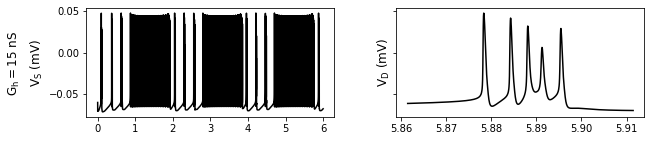

In [213]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2), sharey=True)

plt.subplots_adjust(wspace=0.25)

t_centro = int(0.5 * (trens_ind[-1][0] + trens_ind[-1][-1]))
monta_grafico_zoom(
    V_S,
    V_S[(t_centro - int(25e-3 / dt)) : (t_centro + int(25e-3 / dt))],
    t_i=t_i,
    t_f=t_f,
    t_izoom=t_centro * dt - 25e-3,
    t_fzoom=t_centro * dt + 25e-3,
    dt=dt,
    ylabel=True,
    xlabel=False,
    fig=fig,
    ax=ax,
)

fig.text(0.015, 0.3, r"$\mathrm{G_{h} = 15~nS}$", rotation="vertical", fontsize=12)